In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [15]:
df = pd.read_csv(path)
df.drop(columns='CLIENTNUM',inplace=True)

In [16]:
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [17]:
df = df.rename(columns={'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1': 'newName1', 
                        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2': 'newName2'})

df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer':1,'Attrited Customer':0})

dict1={"Unknown":0,"Uneducated":1,"High School":2,"College":3,"Graduate":4,"Post-Graduate":5,"Doctorate":6}
df['Education_Level']=df['Education_Level'].map(dict1)

dict2={"Unknown":0,"Less than $40K":1,"$40K - $60K":2,"$60K - $80K":3,"$80K - $120K":4,"$120K +":5}
df['Income_Category']=df['Income_Category'].map(dict2)

df['Card_Category']=df['Card_Category'].map({'Blue': 0, 'Silver': 1, 'Gold': 2, 'Platinum': 3})

In [18]:
df = pd.get_dummies(df)

In [19]:
df.corr()

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,newName1,newName2,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
Attrition_Flag,1.000000,-0.018203,-0.018991,-0.008796,0.013577,-0.002354,-0.013687,0.150005,-0.152449,-0.204491,...,0.290054,0.178410,-0.999989,0.999989,-0.037272,0.037272,-0.000850,0.023735,-0.019037,-0.008904
Customer_Age,-0.018203,1.000000,-0.122254,-0.002369,0.023508,-0.018235,0.788912,-0.010931,0.054361,-0.018452,...,-0.012143,0.007114,0.018189,-0.018189,0.017312,-0.017312,-0.042614,0.047364,-0.011248,-0.026694
Dependent_count,-0.018991,-0.122254,1.000000,0.000472,0.066278,0.030469,-0.103062,-0.039076,-0.010768,-0.040505,...,0.011087,-0.037135,0.019189,-0.019189,-0.004563,0.004563,0.006697,0.014385,-0.040707,0.041743
Education_Level,-0.008796,-0.002369,0.000472,1.000000,-0.011677,0.014989,0.006613,0.000766,0.005761,-0.006280,...,-0.016692,-0.001849,0.008890,-0.008890,0.005087,-0.005087,0.005493,0.014051,-0.015067,-0.004186
Income_Category,0.013577,0.023508,0.066278,-0.011677,1.000000,0.077326,0.022122,-0.003202,-0.016310,0.023113,...,-0.012657,-0.246476,-0.013524,0.013525,-0.786608,0.786608,-0.008734,0.023808,-0.024715,0.009417
Card_Category,-0.002354,-0.018235,0.030469,0.014989,0.077326,1.000000,-0.012535,-0.094077,-0.014629,-0.000442,...,-0.007261,-0.198711,0.002365,-0.002365,-0.080093,0.080093,-0.004028,-0.049254,0.040783,0.021881
Months_on_book,-0.013687,0.788912,-0.103062,0.006613,0.022122,-0.012535,1.000000,-0.009203,0.074164,-0.010774,...,-0.014072,-0.007541,0.013693,-0.013694,0.006728,-0.006728,-0.027678,0.033194,-0.005065,-0.026145
Total_Relationship_Count,0.150005,-0.010931,-0.039076,0.000766,-0.003202,-0.094077,-0.009203,1.000000,-0.003675,0.055203,...,0.040831,0.067663,-0.149981,0.149981,-0.003157,0.003157,0.009276,0.017001,-0.017329,-0.009376
Months_Inactive_12_mon,-0.152449,0.054361,-0.010768,0.005761,-0.016310,-0.014629,0.074164,-0.003675,1.000000,0.029493,...,-0.038989,-0.007503,0.153452,-0.153452,0.011163,-0.011163,0.001796,-0.007065,0.008973,-0.005053
Contacts_Count_12_mon,-0.204491,-0.018452,-0.040505,-0.006280,0.023113,-0.000442,-0.010774,0.055203,0.029493,1.000000,...,-0.094997,-0.055471,0.205772,-0.205772,-0.039987,0.039987,-0.008389,0.001598,0.007997,-0.009562


In [20]:
df.drop(columns=['newName1','newName2'],inplace=True)

In [21]:
df

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,1,45,3,2,3,0,39,5,1,3,...,1144,42,1.625,0.061,0,1,0,1,0,0
1,1,49,5,4,1,0,44,6,1,2,...,1291,33,3.714,0.105,1,0,0,0,1,0
2,1,51,3,4,4,0,36,4,1,0,...,1887,20,2.333,0.000,0,1,0,1,0,0
3,1,40,4,2,1,0,34,3,4,1,...,1171,20,2.333,0.760,1,0,0,0,0,1
4,1,40,3,1,3,0,21,5,1,0,...,816,28,2.500,0.000,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50,2,4,2,0,40,3,2,3,...,15476,117,0.857,0.462,0,1,0,0,1,0
10123,0,41,2,0,2,0,25,4,2,3,...,8764,69,0.683,0.511,0,1,1,0,0,0
10124,0,44,1,2,1,0,36,5,3,4,...,10291,60,0.818,0.000,1,0,0,1,0,0
10125,0,30,2,4,2,0,36,4,3,3,...,8395,62,0.722,0.000,0,1,0,0,0,1


In [22]:
corr_rel = []
col_name = []
for i in df.columns:
    if i!='Attrition_Flag':
        corr_rel.append(df['Attrition_Flag'].corr(df[i]))
        col_name.append(i)
xxx = pd.DataFrame(zip(col_name,corr_rel),columns=['Column_name','Corr_effc'])

xxx['Corr_effc'] = abs(xxx['Corr_effc'])

xx = xxx.sort_values('Corr_effc',ascending = False)

xx.index = np.arange(0,xx.shape[0])

xx

,Column_name,Corr_effc
0,Total_Trans_Ct,0.371403
1,Total_Ct_Chng_Q4_Q1,0.290054
2,Total_Revolving_Bal,0.263053
3,Contacts_Count_12_mon,0.204491
4,Avg_Utilization_Ratio,0.178410
5,Total_Trans_Amt,0.168598
6,Months_Inactive_12_mon,0.152449
7,Total_Relationship_Count,0.150005
8,Total_Amt_Chng_Q4_Q1,0.131063
9,Gender_M,0.037272


In [23]:
mtrcs_name = ['accuracy_score','precision_score','recall_score', 'f1_score']
mtrcs_func = [accuracy_score,precision_score,recall_score, f1_score]

dictt = dict(zip(mtrcs_name,mtrcs_func)) 

In [24]:
y = df['Attrition_Flag']
x = df[xx['Column_name'].values[:7]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)


In [25]:
models = [DecisionTreeClassifier(), 
          RandomForestClassifier(),
          AdaBoostClassifier(),
          GradientBoostingClassifier(),
          xgb.XGBClassifier()
          ]
model_names = ['DecisionTreeClassifier','RandomForestClassifier','AdaBoostClassifier','GradientBoostingClassifier','xgb.XGBClassifier']

dicttt = dict(zip(model_names,models))

metricss = []

for p,o in dicttt.items():
    clf = o
    clf.fit(x_train, y_train)
    y_pred=clf.predict(x_test)

    for m,n in dictt.items():
        metricss.append(n(y_test, y_pred))

df3 = pd.DataFrame(np.array(metricss).reshape(5,4),columns=mtrcs_name)

df3.index = list(dicttt.keys())

df3

,accuracy_score,precision_score,recall_score,f1_score
DecisionTreeClassifier,0.918065,0.955859,0.947348,0.951585
RandomForestClassifier,0.944390,0.960687,0.974448,0.967519
AdaBoostClassifier,0.940441,0.959449,0.970964,0.965172
GradientBoostingClassifier,0.946364,0.960777,0.976771,0.968708
xgb.XGBClassifier,0.948009,0.966526,0.972513,0.969510


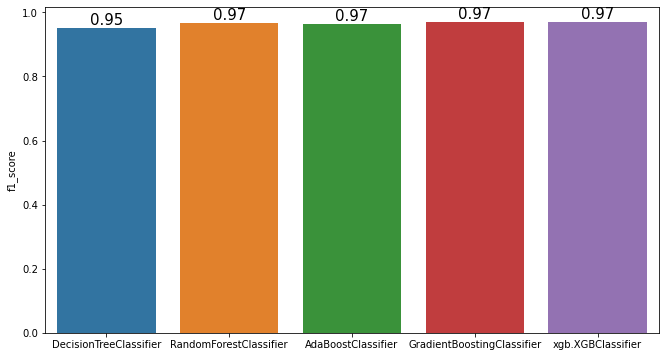

In [26]:
# plot results
fig, ax = plt.subplots(figsize=(11, 6))
plots = sns.barplot(x=df3.index, y=df3['f1_score'], ax=ax)

for bar in plots.patches:
   
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')